In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

file_path = '/home/bhikrant07/Desktop/AI/KU_STUDENT_DATA_ON_CAMPUS_PLACEMENT.csv'
data = pd.read_csv(file_path)


print(data.head())
print(data.info())

# Encode categorical features
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])


# Normalize numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

  Branch               Cepo  Program  End term exam SGPA - 1st semester   \
0    CSE  Currently enrolled  B.Tech                                6.50   
1    CSE  Currently enrolled  B.Tech                                7.70   
2    CSE          Passed out  B.Tech                                6.96   
3    CSE          Passed out  B.Tech                                6.20   
4    CSE  Currently enrolled  B.Tech                                6.20   

   End term exam SGPA - 2nd semester  End term exam SGPA - 3rd semester  \
0                               7.20                               6.10   
1                               8.57                               7.70   
2                               7.14                               6.71   
3                               6.30                               7.88   
4                               6.30                               6.30   

   End term exam SGPA - 4th semester  End term exam SGPA - 5th semester  \
0                

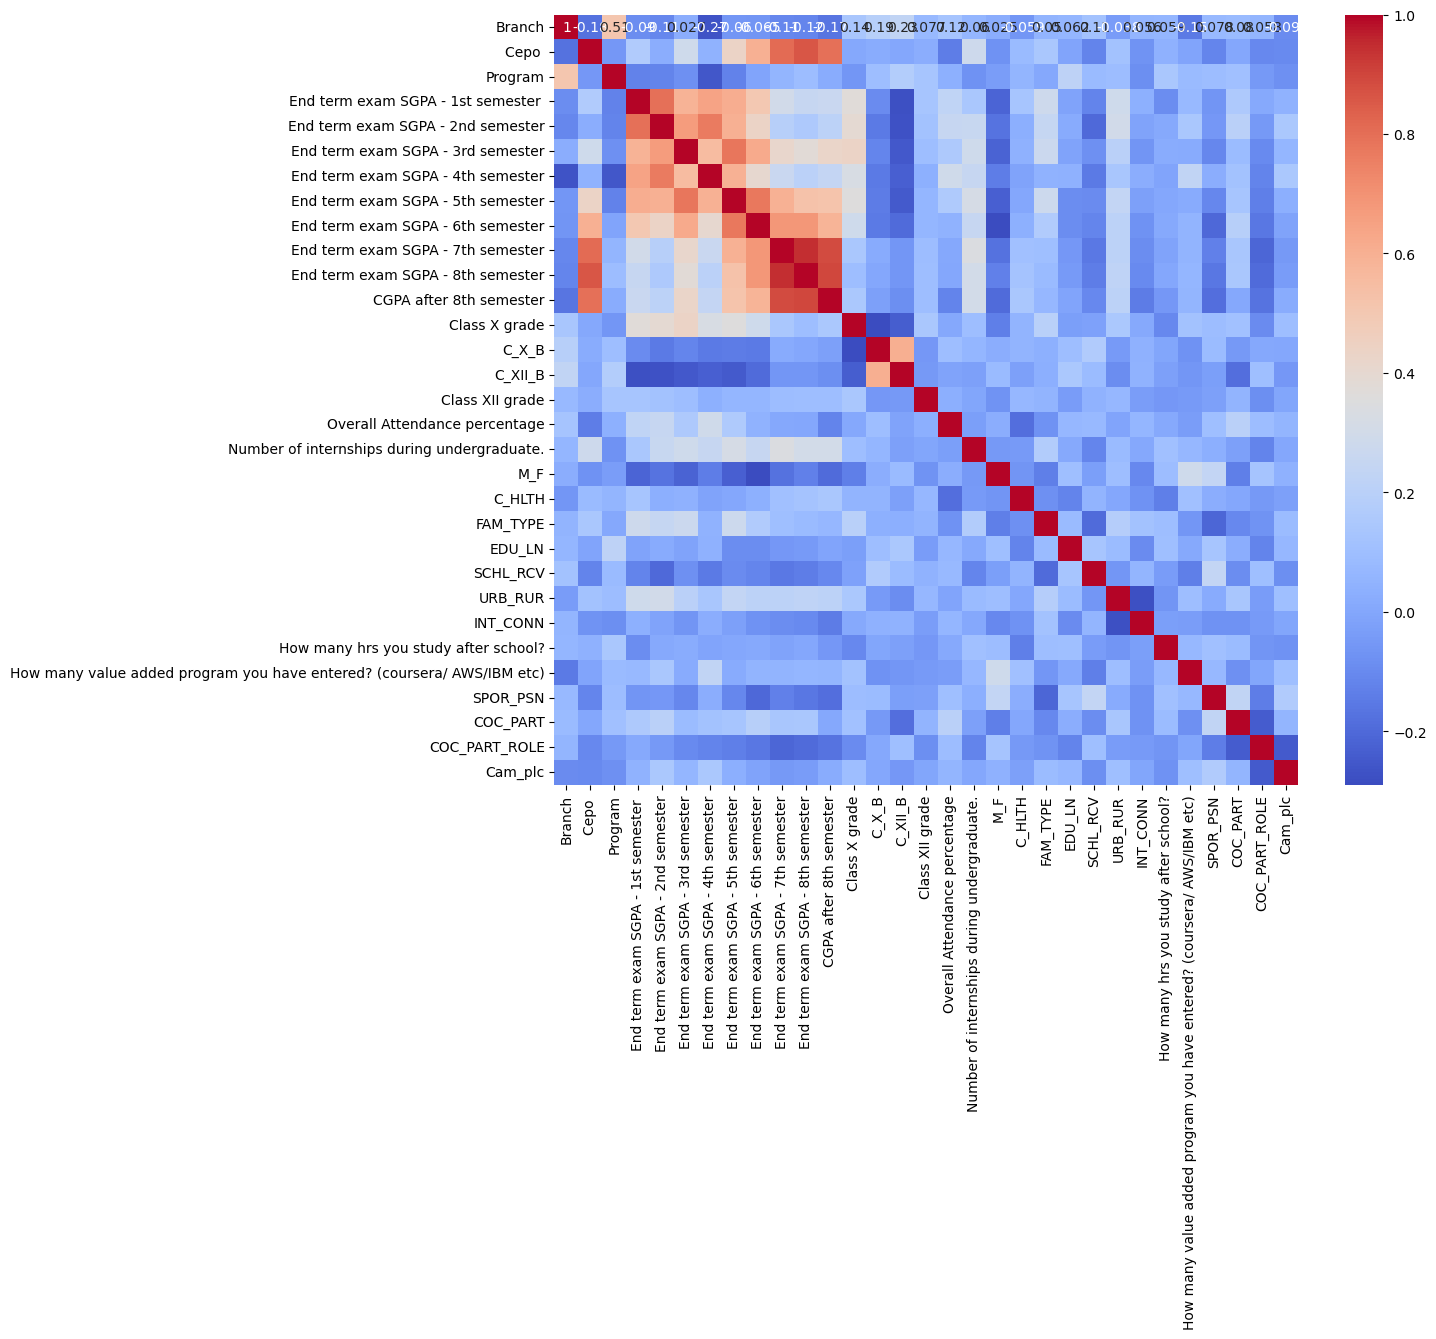

Relevant features for predicting CGPA: ['Cepo ', 'End term exam SGPA - 3rd semester', 'End term exam SGPA - 5th semester', 'End term exam SGPA - 6th semester', 'End term exam SGPA - 7th semester', 'End term exam SGPA - 8th semester', 'CGPA after 8th semester', 'Number of internships during undergraduate.']
Relevant features for predicting Placement: ['Cam_plc']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


target_cgpa = 'CGPA after 8th semester'
correlation_threshold = 0.3
relevant_features_cgpa = corr_matrix[target_cgpa][corr_matrix[target_cgpa].abs() > correlation_threshold].index.tolist()
print("Relevant features for predicting CGPA:", relevant_features_cgpa)

target_placement = 'Cam_plc'
relevant_features_placement = corr_matrix[target_placement][corr_matrix[target_placement].abs() > correlation_threshold].index.tolist()
print("Relevant features for predicting Placement:", relevant_features_placement)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam


additional_features_placement = [
    'CGPA after 8th semester',  
    'Overall Attendance percentage',
    'End term exam SGPA - 8th semester'
]

# feature sets
X_cgpa = data[relevant_features_cgpa].drop(['CGPA after 8th semester'], axis=1)
y_cgpa = data['CGPA after 8th semester']

X_placement = data[additional_features_placement]
y_placement = data['Cam_plc']


X_train_cgpa, X_test_cgpa, y_train_cgpa, y_test_cgpa = train_test_split(X_cgpa, y_cgpa, test_size=0.2, random_state=42)
X_train_placement, X_test_placement, y_train_placement, y_test_placement = train_test_split(X_placement, y_placement, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train_cgpa_reshaped = np.reshape(X_train_cgpa.values, (X_train_cgpa.shape[0], X_train_cgpa.shape[1], 1))
X_test_cgpa_reshaped = np.reshape(X_test_cgpa.values, (X_test_cgpa.shape[0], X_test_cgpa.shape[1], 1))

X_train_placement_reshaped = np.reshape(X_train_placement.values, (X_train_placement.shape[0], X_train_placement.shape[1], 1))
X_test_placement_reshaped = np.reshape(X_test_placement.values, (X_test_placement.shape[0], X_test_placement.shape[1], 1))

# LSTM for CGPA 
def create_cgpa_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1, activation='linear'))  
    
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return model

# LSTM for prediction placement
def create_placement_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1, activation='sigmoid'))  
    
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train & evaluate 
model_cgpa = create_cgpa_lstm_model((X_train_cgpa_reshaped.shape[1], X_train_cgpa_reshaped.shape[2]))
model_cgpa.fit(X_train_cgpa_reshaped, y_train_cgpa, epochs=10, batch_size=32, verbose=1)
loss_cgpa, mse_cgpa = model_cgpa.evaluate(X_test_cgpa_reshaped, y_test_cgpa, verbose=0)
print('MSE for CGPA:', mse_cgpa)


model_placement = create_placement_lstm_model((X_train_placement_reshaped.shape[1], X_train_placement_reshaped.shape[2]))
model_placement.fit(X_train_placement_reshaped, y_train_placement, epochs=10, batch_size=32, verbose=1)
loss_placement, acc_placement = model_placement.evaluate(X_test_placement_reshaped, y_test_placement, verbose=0)
print('Accuracy for Placement:', acc_placement)


2024-06-20 12:47:21.126231: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 12:47:21.152586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 12:47:21.591682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10


2024-06-20 12:47:22.619579: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/bhikrant07/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5902 - mse: 0.5902
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2744 - mse: 0.2744 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3095 - mse: 0.3095 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2795 - mse: 0.2795 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2493 - mse: 0.2493 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2015 - mse: 0.2015 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2810 - mse: 0.2810 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2039 - mse: 0.2039 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1607 - mse: 0.1607 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1866 - mse: 0.1866 
MSE for CGPA: 0.0953030064702034
Epoch 1/10


/home/bhikrant07/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5777
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0322 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2673 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1035  
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -0.3919 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -0.9084 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3499  
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -0.1079 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1415 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -1.4542 
Accuracy for Placement: 0.0


In [4]:
correlation_matrix = data.corr()
print(correlation_matrix['Cam_plc'])


Branch                                                                   -0.096916
Cepo                                                                     -0.098589
Program                                                                  -0.081759
End term exam SGPA - 1st semester                                         0.045984
End term exam SGPA - 2nd semester                                         0.144216
End term exam SGPA - 3rd semester                                         0.062583
End term exam SGPA - 4th semester                                         0.145738
End term exam SGPA - 5th semester                                         0.033126
End term exam SGPA - 6th semester                                        -0.013995
End term exam SGPA - 7th semester                                        -0.048397
End term exam SGPA - 8th semester                                        -0.041992
CGPA after 8th semester                                                   0.019747
Clas